In [ ]:
!wget https://www.dropbox.com/s/dgjhhjeisle9w60/jackelonfaces.zip?dl=0 -O jackelonfaces.zip

--2021-02-10 07:48:21--  https://www.dropbox.com/s/dgjhhjeisle9w60/jackelonfaces.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/dgjhhjeisle9w60/jackelonfaces.zip [following]
--2021-02-10 07:48:21--  https://www.dropbox.com/s/raw/dgjhhjeisle9w60/jackelonfaces.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc92643813a564c5d43a2302b403.dl.dropboxusercontent.com/cd/0/inline/BIpaUcP2cWO3zoGINlCyGYKAiRbebBxgf1NH8pYF3GmAFd5ZzuUGAnidXXVbLM3dD78gr4M__3U9iYOfCY1Pzs5Y4-_XIltgUDNxzHD7tHWwwrUyoU0hVhiiLomritFm1js/file# [following]
--2021-02-10 07:48:22--  https://uc92643813a564c5d43a2302b403.dl.dropboxusercontent.com/cd/0/inline/BIpaUcP2cWO3zoGINlCyGYKAiRbebBxgf1NH8pYF3GmAFd5ZzuUGAnidXXVbLM3dD78gr4M__3U9iYOfCY1Pzs5Y4-_

In [ ]:
!unzip -q -o /content/jackelonfaces.zip

In [ ]:
import numpy as np
import os
import cv2
from joblib import dump,load
from sklearn.svm import SVC
from imutils import paths

In [ ]:
imagePaths = list(paths.list_images("jackelonfaces"))
print(imagePaths)
data = []
label = []

for imagePath in imagePaths:
  print(imagePath.split(os.path.sep))

['jackelonfaces/jackma/pic.1.9.jpg', 'jackelonfaces/jackma/pic.1.5.jpg', 'jackelonfaces/jackma/pic.1.4.jpg', 'jackelonfaces/jackma/pic.1.2.jpg', 'jackelonfaces/jackma/pic.1.3.jpg', 'jackelonfaces/jackma/pic.1.1.jpg', 'jackelonfaces/jackma/pic.1.7.jpg', 'jackelonfaces/jackma/pic.1.10.jpg', 'jackelonfaces/jackma/pic.1.6.jpg', 'jackelonfaces/jackma/pic.1.8.jpg', 'jackelonfaces/elonmusk/pic.2.9.jpg', 'jackelonfaces/elonmusk/pic.2.1.jpg', 'jackelonfaces/elonmusk/pic.2.8.jpg', 'jackelonfaces/elonmusk/pic.2.2.jpg', 'jackelonfaces/elonmusk/pic.2.5.jpg', 'jackelonfaces/elonmusk/pic.2.10.jpg', 'jackelonfaces/elonmusk/pic.2.7.jpg', 'jackelonfaces/elonmusk/pic.2.6.jpg', 'jackelonfaces/elonmusk/pic.2.3.jpg', 'jackelonfaces/elonmusk/pic.2.4.jpg']
['jackelonfaces', 'jackma', 'pic.1.9.jpg']
['jackelonfaces', 'jackma', 'pic.1.5.jpg']
['jackelonfaces', 'jackma', 'pic.1.4.jpg']
['jackelonfaces', 'jackma', 'pic.1.2.jpg']
['jackelonfaces', 'jackma', 'pic.1.3.jpg']
['jackelonfaces', 'jackma', 'pic.1.1.jpg']

In [ ]:
imagePaths = list(paths.list_images("jackelonfaces"))
data = []
labels = []
#print(imagePaths)

for imagePath in imagePaths:
	label = imagePath.split(os.path.sep)[-2]
	#print(label)
	if label == "elonmusk":
		label = 0
	else :
		label = 1
	image = cv2.imread(imagePath)
	resized = cv2.resize(image,(64,64),interpolation=cv2.INTER_LINEAR)
	gray = cv2.cvtColor(resized,cv2.COLOR_BGR2GRAY)
	data.append(np.ravel(gray))
	labels.append(label)

	
labels = np.array(labels)
clf = SVC(kernel='linear',probability=True)
clf.fit(data,labels)
dump(clf,"jackelonsvmclassifier.lib")
print("Train Sucess") 


Train Sucess


In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
faceCascades = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
svmClassifier = load("jackelonsvmclassifier.lib")

In [ ]:
def face_detect(img,clf):
  gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  faces = faceCascades.detectMultiScale(gray,1.2,15)
  text = "None"
  for (x,y,w,h) in faces:
    faceset = []
    face = gray[y:y+h,x:x+w]
    face_resized = cv2.resize(face,(64,64),interpolation=cv2.INTER_LINEAR)
    faceset.append(np.ravel(face_resized))
    pred = clf.predict(faceset)
    prob = clf.predict_proba(faceset)
    print(pred,prob)
    if pred == [0]:
      text = "Elon Musk"
    elif pred == [1]:
      text = "Jack Ma"
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    cv2.putText(img,text,(x,y-4),cv2.FONT_HERSHEY_SIMPLEX,0.8,(0,0,255),2)
  return img

In [ ]:
image = cv2.imread("jackelon.jpg")
image = face_detect(image,svmClassifier)

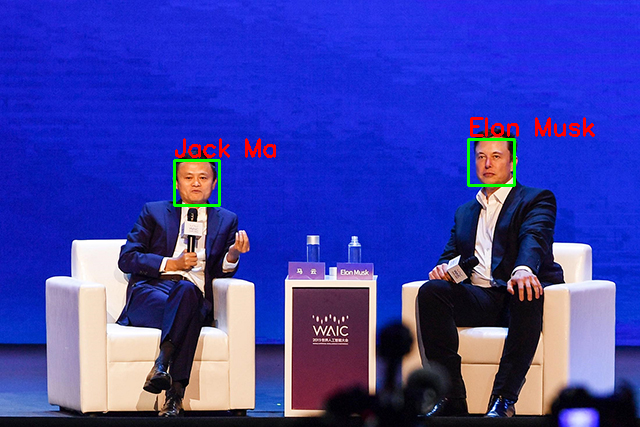

In [ ]:
cv2_imshow(image)